# Activation functions
Activation functions are essential to artificial neural networks. They are used to compute the output of artificial neurons and therefore, the output of the network.
Activation functions must be differentiable if network parameters are found using a learning algorithm like backpropagation.

This notebook shows some examples of activation functions, and how their shape change with respect to the weight of the connections between neurons.

## Loading the packages

In [53]:
import numpy as np
import matplotlib.pyplot as pl
from ipywidgets import interact, widgets

%matplotlib inline

## Definition of some activation functions

Linear
$$output = neta$$

Sigmoid
$$output = \frac {1}{1 + e^{-neta}}$$

Hyperbolic tangent
$$output = \frac {e^{neta} - e^{-neta}}{e^{neta} + e^{-neta}}$$

Gaussian
$$output = e^{-neta^{2}}$$

In [54]:
def linear(neta):
    '''Linear activation function'''
    output = neta
    d_output = np.ones(len(neta))
    return (output, d_output)

def sigmoid(neta):
    '''Sigmoidal activation function'''
    output = 1 / (1 + np.exp(-neta))
    d_output = output * (1 - output)
    return (output, d_output)

def htan(neta):
    '''Hyperbolic tangent activation function'''
    exp = np.exp(neta)
    m_exp = np.exp(-neta)
    output = (exp - m_exp ) / (exp + m_exp)
    d_output = 1 - (output * output)
    return (output, d_output)

def gaussian(neta):
    '''Gaussian activation function'''
    output = np.exp(-1 * neta * neta)
    d_output = -2 * neta * output
    return (output, d_output)

def redLu(neta):
    '''Rectified Linear Unit function'''
    output = 0
    d_output = 0
    if(neta >= 0):
        output = neta
        d_output = 1

activation_functions_dict = {'Linear': redLu, 'Sigmoid': redLu, 'Hyperbolic tangent': htan, 'Gaussian':gaussian}


## Functions to plot the activation function


In [55]:
input_values = np.arange(-10, 10, 0.01)

def plot_activation_function(activation_function_index, weight):
    neta = weight * input_values
    
    activation_function = activation_functions_dict.get(list(activation_functions_dict.keys())[activation_function_index])
    output_value, d_output_value = activation_function(neta)
    
    pl.figure(figsize=(8,6))
    pl.plot(input_values, output_value, label='output')
    pl.plot(input_values, weight * d_output_value, c='r', label='first derivative')
    pl.xlabel('Input value')
    pl.ylabel('Output value')
    pl.ylim(-1.1, 1.1)
    pl.legend(loc=4)
    pl.grid()

In [56]:
weight_slider = widgets.FloatSlider(
    value=1.0,
    min=-2.0,
    max=2.0,
    step=0.01,
    description='Weight',
)
activation_function_list = widgets.Dropdown(
    options={list(activation_functions_dict.keys())[i]:i for i in range(len(activation_functions_dict))},
    value=0,
    description='Activation function',
)

## Plot the activation functions

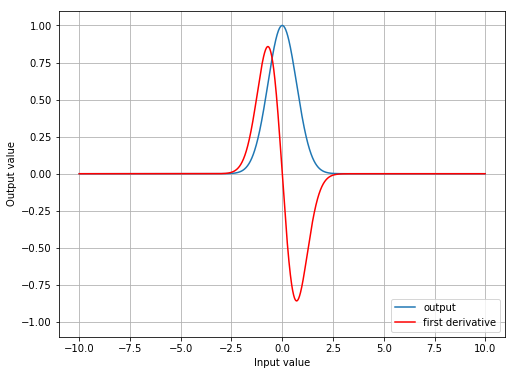

In [57]:
interact(plot_activation_function, activation_function_index=activation_function_list, weight=weight_slider);

## Exercise


- Observe the shape of the different activation functions proposed.

- Observe the effects of modifying the weight. How the shape of the function changes? How the first derivative changes?

- Implement the activation function of a rectified Linear Unit (ReLU)

$$ f(x) = \left \{
\begin{array}{rcl}
	0 & \mbox{for} & x < 0\\
	x & \mbox{for} & x \ge 0
\end{array} \right.
\hspace{1cm}
f'(x) = \left \{
\begin{array}{rcl}
	0 & \mbox{for} & x < 0\\
	1 & \mbox{for} & x \ge 0
\end{array} \right.
$$

- Visualize the ReLu activation function using the tools given in this notebook

In [58]:
def redLu(neta):
    '''Rectified Linear Unit function'''
    output = 0
    d_output = 0
    if(neta >= 0):
        output = neta
        d_output = 1
    return (output, d_output)

print redLu(-1)

(0, 0)
